## ***Visión por Computadora - 2024***
### *Lab 01 - Ejercicio 2*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------


Invertir y binarizar la imagen fingerprint.jpeg a continuación. Luego, aplicar transformaciones morfológicas adecuadas para remover y restaurar la imagen.



#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

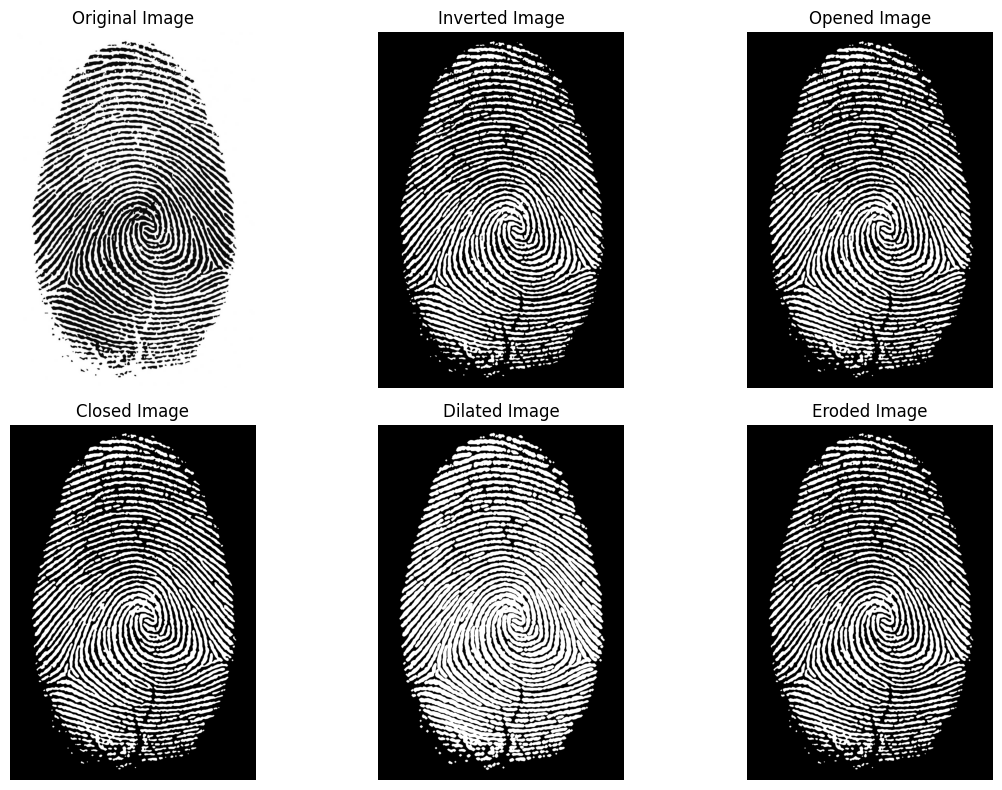

In [8]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.util import invert
from skimage.filters import threshold_otsu, gaussian
from skimage.morphology import binary_opening, binary_closing, binary_dilation, binary_erosion
from skimage import io, color, filters, feature, morphology, exposure, util


# Load the image
image_path = 'img/fingerprint.jpeg'
image = imread(image_path)

# Convert to grayscale
gray_image = rgb2gray(image)

# Apply a Gaussian filter to smooth the image
smoothed_image = gaussian(gray_image, sigma=1)

# Use Otsu's method to find an optimal threshold
thresh = threshold_otsu(smoothed_image)
binary_image = smoothed_image > thresh

# Invert the image
inverted_image = invert(binary_image)

# Define a smaller structuring element for morphological operations
selem= morphology.disk(2)

# Apply morphological operations
# Opening to remove small noise
opened_image = binary_opening(inverted_image, selem)
# Closing to connect ridges
closed_image = binary_closing(opened_image, selem)
# Dilation to enhance the ridges
dilated_image = binary_dilation(closed_image, selem)
# Erosion to thin out the ridges
eroded_image = binary_erosion(dilated_image, selem)


# Display the original grayscale and the processed images
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharex=True, sharey=True)
ax = axes.ravel()

# Place the original grayscale image in the first quadrant
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(inverted_image, cmap='gray')
ax[1].set_title('Inverted Image')
ax[2].imshow(opened_image, cmap='gray')
ax[2].set_title('Opened Image')
ax[3].imshow(closed_image, cmap='gray')
ax[3].set_title('Closed Image')
ax[4].imshow(dilated_image, cmap='gray')
ax[4].set_title('Dilated Image')
ax[5].imshow(eroded_image, cmap='gray')
ax[5].set_title('Eroded Image')


# Turn off axes for all plots
for a in ax:
    a.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


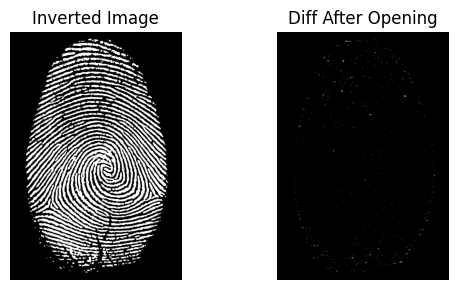

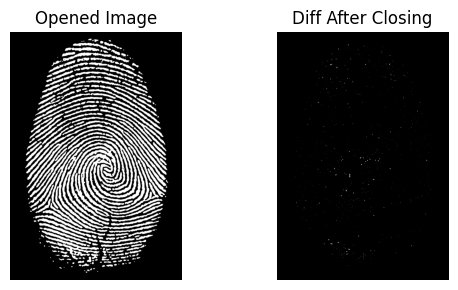

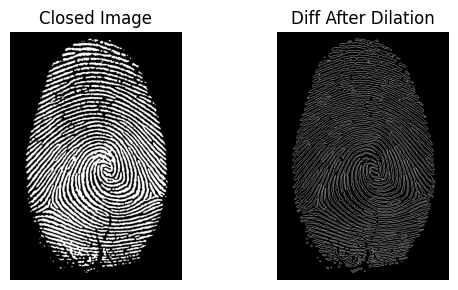

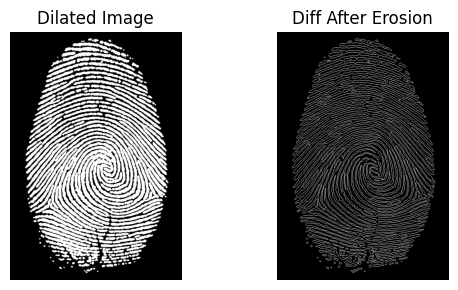

In [9]:
# Function to show the differences with correct representation of the current state of the image
def show_difference_with_current(original, processed, title_original, title_difference):
    difference = original ^ processed
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title_original)
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(difference, cmap='gray')
    plt.title(title_difference)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Correctly show the differences after each morphological operation
show_difference_with_current(inverted_image, opened_image, 'Inverted Image', 'Diff After Opening')
show_difference_with_current(opened_image, closed_image, 'Opened Image', 'Diff After Closing')
show_difference_with_current(closed_image, dilated_image, 'Closed Image', 'Diff After Dilation')
show_difference_with_current(dilated_image, eroded_image, 'Dilated Image', 'Diff After Erosion')


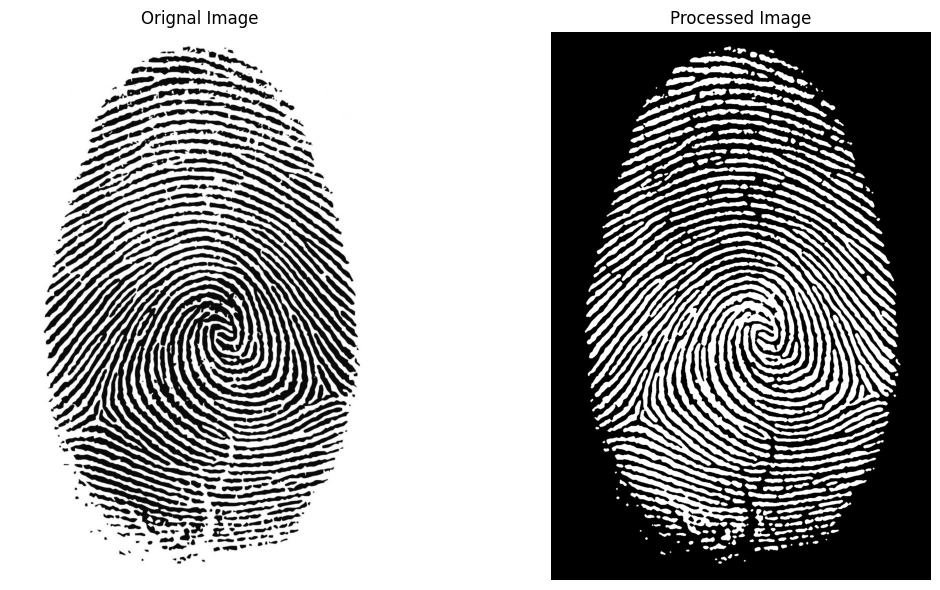

In [10]:
# Mostrar imagen original vs imagen procesada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orignal Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(eroded_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')
plt.tight_layout()
plt.show()


In [11]:
# Apply Canny edge detection
edges = feature.canny(eroded_image, sigma=1)

# Apply skeletonization to reduce the thickness of the ridges
skeleton = morphology.skeletonize(edges)

# Enhance contrast using histogram equalization on the skeletonized image
# Image needs to be converted to 8-bit unsigned integer type for histogram equalization
skeleton_ubyte = util.img_as_ubyte(skeleton)
equalized_image = exposure.equalize_hist(skeleton_ubyte)

selem_dilation = morphology.disk(1)

# Apply morphological dilation
dilated_ridges = morphology.binary_dilation(skeleton, selem_dilation)

# Invert the image to match the original's style (ridges in black, background in white)
final_image = util.invert(dilated_ridges)


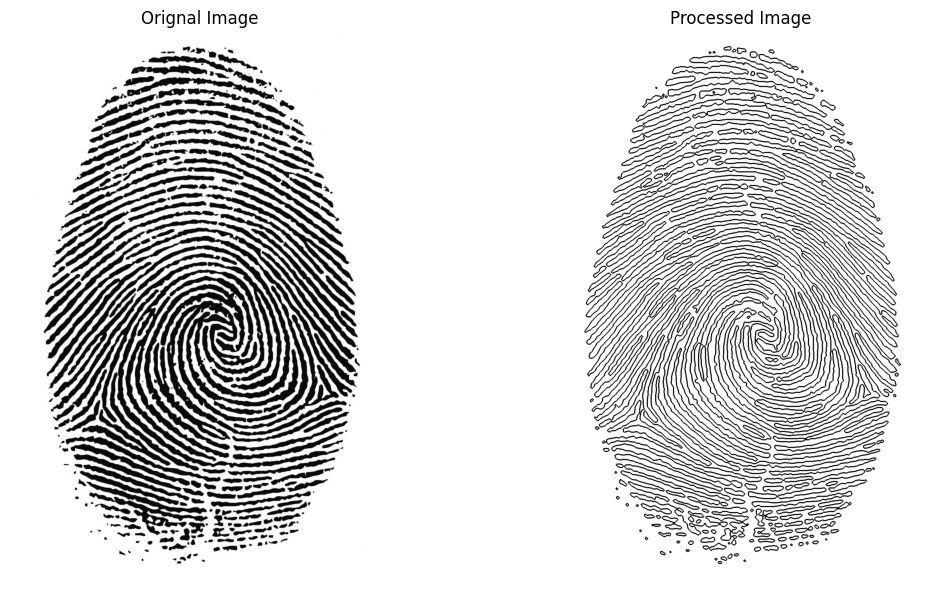

In [12]:
# Mostrar imagen original vs imagen procesada
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Orignal Image')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(final_image, cmap='gray')
plt.title('Processed Image')
plt.axis('off')
plt.tight_layout()
plt.show()
